`ApJdataFrames` Douglas_2017 *Extra, 1*
---
`Title`: Poking the Beehive from Space: K2 Rotation Periods for Praesepe    
`Authors`: S. T. Douglas, M. A. Agüeros, K. R. Covey, and A. Kraus

Data is from this paper:  
http://iopscience.iop.org/article/10.3847/1538-4357/aa6e52/meta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 150
%config InlineBackend.figure_format = 'retina'
import astropy
from astropy.table import Table
from astropy.io import ascii
import numpy as np

## Douglas et al. 2016 Tables 2 & 3

In [2]:
df2 = pd.read_csv('../data/Douglas2017/tab2.csv')
df3 = pd.read_csv('../data/Douglas2017/tab3.csv')

## Spectroscopic selection for iSHELL C16 monitoring

Selection criteria for iSHELL

0. Previously observed by Douglas et al. 2017
1. Being observed in K2 C16
2. Bright enough for iSHELL
3. Large amplitude of starspot modulation
4. Medium-to-low period (lower vsini, on average)


The K2 website has the list of targets in C16

In [3]:
c16_GO_url = 'https://keplerscience.arc.nasa.gov/data/campaigns/c16/K2Campaign16targets.csv'

In [4]:
df_GO_c16 = pd.read_csv(c16_GO_url)

In [5]:
df3.shape, df_GO_c16.shape

((794, 26), (35571, 5))

In [6]:
df_C16 = pd.merge(df3, df_GO_c16, how = 'inner', left_on='EPIC', right_on='EPIC ID')

In [7]:
df_C16.shape

(308, 31)

OK, so 308 targets are being re-observed.  Good.

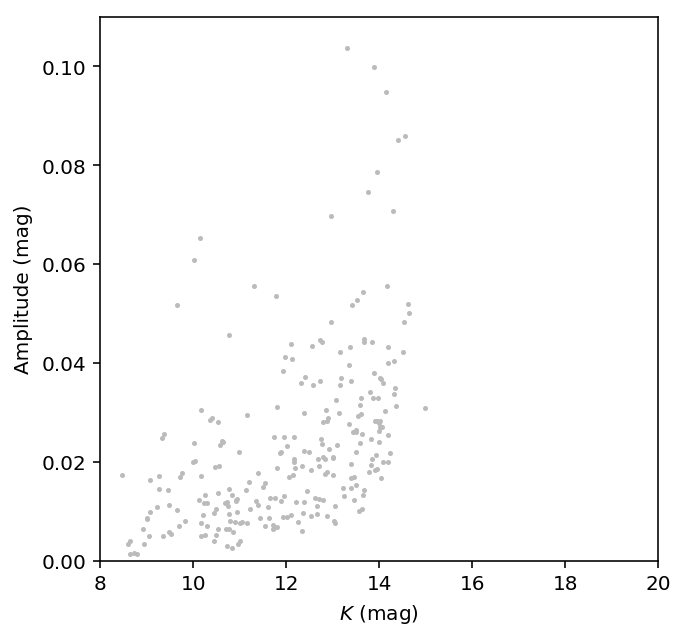

In [8]:
plt.figure(figsize=(5,5))
plt.plot(df_C16.Kmag, df_C16['Raw-Amp'], '.', ms=3, color='#BBBBBB')
plt.xlim(8, 20)
plt.ylim(0, 0.11)
plt.xlabel('$K$ (mag)')
plt.ylabel('Amplitude (mag)')

The iSHELL exposure time calculator indicates a 10.9 magnitude can be achieved in 10 minutes with 6 cycles with a 0.75 arcsecond slit in 0.8 arcsecond seeing.  We don't want to go too bright, because those targets are likely to be more massive stars, which don't show starspots, or are facula dominated.

In [9]:
df_C16['Raw-Amp'].max()

0.27984000000000003

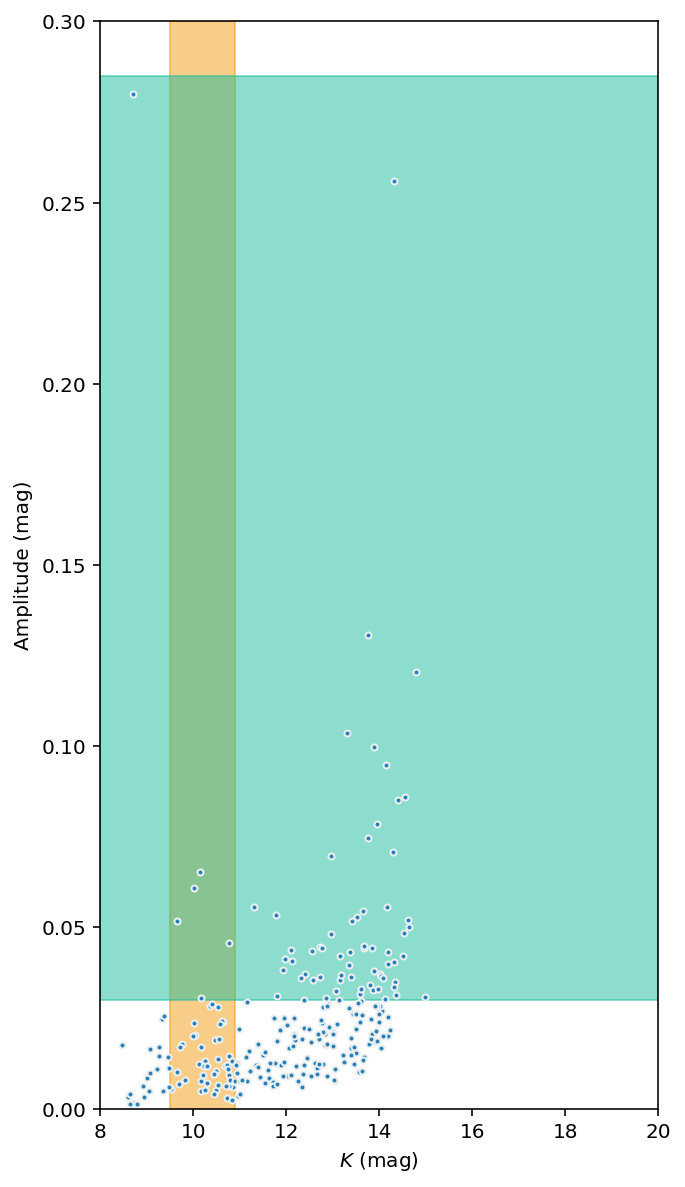

In [10]:
plt.figure(figsize=(5,10))
plt.axvspan(9.5, 10.9, alpha=0.5, color='#f39c12')
plt.axhspan(0.03, 0.285, alpha=0.5, color='#1abc9c')
plt.plot(df_C16.Kmag, df_C16['Raw-Amp'], 'o', ms=3, color='#2980b9', mec='#ecf0f1')
plt.xlim(8, 20)
plt.ylim(0, 0.30)



plt.xlabel('$K$ (mag)')
plt.ylabel('Amplitude (mag)')
plt.savefig('/Users/obsidian/Desktop/beehive/iSHELL_beehive.png', dpi=300)

Well, there are a few objects in the target range.

In [11]:
subset = (df_C16.Kmag > 9.5) & (df_C16.Kmag < 10.9) & (df_C16['Raw-Amp'] > 0.03)
df_C16[subset]

,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],magnitude,Investigation IDs
36,KW434,2.11936e+08,1.05,11.13,9.64,4.18,0.6546,0.0,Y,0.00868,NaN,NaN,NaN,N,Y,N,conf,0.05169,2.09998,K,NaN,NaN,NaN,8.27,11.18,amplitude increases significantly over campaign,211935518,130.476516,19.257418,11.181,GO16001_LC|GO16009_LC|GO16021_LC|GO16022_LC|G...
99,KW256,2.1192e+08,1.00,12.30,10.01,4.67,0.4304,0.0,Y,0.00849,NaN,NaN,NaN,M,Y,M,cand,0.06078,2.22994,D,NaN,4.80,NaN,9.76,12.34,NaN,211920022,130.023816,19.025183,12.339,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
160,KW401,2.1191e+08,0.98,12.36,10.15,2.42,0.8636,0.0,Y,0.00818,NaN,NaN,NaN,N,Y,N,conf,0.06528,3.08847,D,NaN,2.43,NaN,9.61,12.36,NaN,211909748,130.37795,18.871872,12.363,GO16009_LC|GO16021_LC|GO16022_LC|GO16031_LC|G...
165,KW448,2.11937e+08,0.97,11.87,10.17,7.89,0.6878,0.0,Y,0.00861,NaN,NaN,NaN,N,Y,N,NaN,0.03040,1.21676,K,NaN,NaN,NaN,7.97,11.90,NaN,211936827,130.54791,19.277002,11.9,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
186,AD 1508,2.12009e+08,0.72,14.14,10.77,1.56,0.8841,0.0,Y,0.00875,NaN,NaN,NaN,N,Y,N,cand,0.04566,2.05561,P,1.55,NaN,NaN,11.22,14.07,NaN,212009427,127.874459,20.410422,14.072,GO16011_LC|GO16022_LC|GO16031_LC|GO16052_LC|G...


In [12]:
df_C16.columns

Index(['NAME', 'EPIC', 'Mass', 'r'mag', 'Kmag', 'Prot1', 'Power1', 'Qual1',
       'Clean?', 'Threshold', 'Prot2', 'Power2', 'Qual2', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag', 'PTF-Prot', 'SWASP-Prot', 'Scholz-Prot', 'Kovacs-Prot',
       'Kpmag', 'Notes', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude', ' Investigation IDs'],
      dtype='object')

In [13]:
df_C16[subset]

,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],magnitude,Investigation IDs
36,KW434,2.11936e+08,1.05,11.13,9.64,4.18,0.6546,0.0,Y,0.00868,NaN,NaN,NaN,N,Y,N,conf,0.05169,2.09998,K,NaN,NaN,NaN,8.27,11.18,amplitude increases significantly over campaign,211935518,130.476516,19.257418,11.181,GO16001_LC|GO16009_LC|GO16021_LC|GO16022_LC|G...
99,KW256,2.1192e+08,1.00,12.30,10.01,4.67,0.4304,0.0,Y,0.00849,NaN,NaN,NaN,M,Y,M,cand,0.06078,2.22994,D,NaN,4.80,NaN,9.76,12.34,NaN,211920022,130.023816,19.025183,12.339,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
160,KW401,2.1191e+08,0.98,12.36,10.15,2.42,0.8636,0.0,Y,0.00818,NaN,NaN,NaN,N,Y,N,conf,0.06528,3.08847,D,NaN,2.43,NaN,9.61,12.36,NaN,211909748,130.37795,18.871872,12.363,GO16009_LC|GO16021_LC|GO16022_LC|GO16031_LC|G...
165,KW448,2.11937e+08,0.97,11.87,10.17,7.89,0.6878,0.0,Y,0.00861,NaN,NaN,NaN,N,Y,N,NaN,0.03040,1.21676,K,NaN,NaN,NaN,7.97,11.90,NaN,211936827,130.54791,19.277002,11.9,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
186,AD 1508,2.12009e+08,0.72,14.14,10.77,1.56,0.8841,0.0,Y,0.00875,NaN,NaN,NaN,N,Y,N,cand,0.04566,2.05561,P,1.55,NaN,NaN,11.22,14.07,NaN,212009427,127.874459,20.410422,14.072,GO16011_LC|GO16022_LC|GO16031_LC|GO16052_LC|G...


In [14]:
good_cols = ['NAME', 'EPIC', 'Mass', "r'mag", 'Kmag', 'Prot1',
       'Clean?', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag',
       'Kpmag', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude']

In [15]:
df_C16.columns

Index(['NAME', 'EPIC', 'Mass', 'r'mag', 'Kmag', 'Prot1', 'Power1', 'Qual1',
       'Clean?', 'Threshold', 'Prot2', 'Power2', 'Qual2', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag', 'PTF-Prot', 'SWASP-Prot', 'Scholz-Prot', 'Kovacs-Prot',
       'Kpmag', 'Notes', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude', ' Investigation IDs'],
      dtype='object')

In [16]:
df_C16[subset][good_cols].T

,36,99,160,165,186
NAME,KW434,KW256,KW401,KW448,AD 1508
EPIC,2.11936e+08,2.1192e+08,2.1191e+08,2.11937e+08,2.12009e+08
Mass,1.05,1,0.98,0.97,0.72
r'mag,11.13,12.3,12.36,11.87,14.14
Kmag,9.64,10.01,10.15,10.17,10.77
Prot1,4.18,4.67,2.42,7.89,1.56
Clean?,Y,Y,Y,Y,Y
Multi-Prot?,N,M,N,N,N
Spot-Evol?,Y,Y,Y,Y,Y
Blended?,N,M,N,N,N


In [17]:
pd.merge(df_C16[subset][good_cols], df2, on='EPIC').T

,0,1,2,3,4
NAME_x,KW434,KW256,KW401,KW448,AD 1508
EPIC,2.11936e+08,2.1192e+08,2.1191e+08,2.11937e+08,2.12009e+08
Mass,1.05,1,0.98,0.97,0.72
r'mag,11.13,12.3,12.36,11.87,14.14
Kmag,9.64,10.01,10.15,10.17,10.77
Prot1,4.18,4.67,2.42,7.89,1.56
Clean?,Y,Y,Y,Y,Y
Multi-Prot?,N,M,N,N,N
Spot-Evol?,Y,Y,Y,Y,Y
Blended?,N,M,N,N,N


## Read in the lightcurve

In [18]:
df_vdb = pd.read_csv('~/Desktop/beehive/c05/211900000/35518/' + \
                     'hlsp_k2sff_k2_lightcurve_211935518-c05_kepler_v1_llc-default-aper.txt', usecols=[0,1])

In [19]:
df_vdb.columns

Index(['BJD - 2454833', ' Corrected Flux'], dtype='object')

In [23]:
#plt.plot(df_vdb['BJD - 2454833'], df_vdb[' Corrected Flux'])

In [24]:
#phased = np.mod(df_vdb['BJD - 2454833'], 3.932626)

In [25]:
#plt.plot(phased, df_vdb[' Corrected Flux'], '.')

Neat.